### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import warnings
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2,f_classif 
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
# Suppress all warnings
warnings.filterwarnings("ignore")

### Data Loading 

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


### EDA Analysis

### count plot for class 

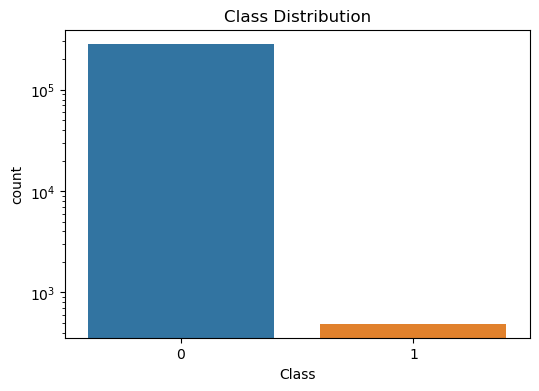

In [9]:
# Create a countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title("Class Distribution")

plt.show()

### histo plot for amount with respect to amount

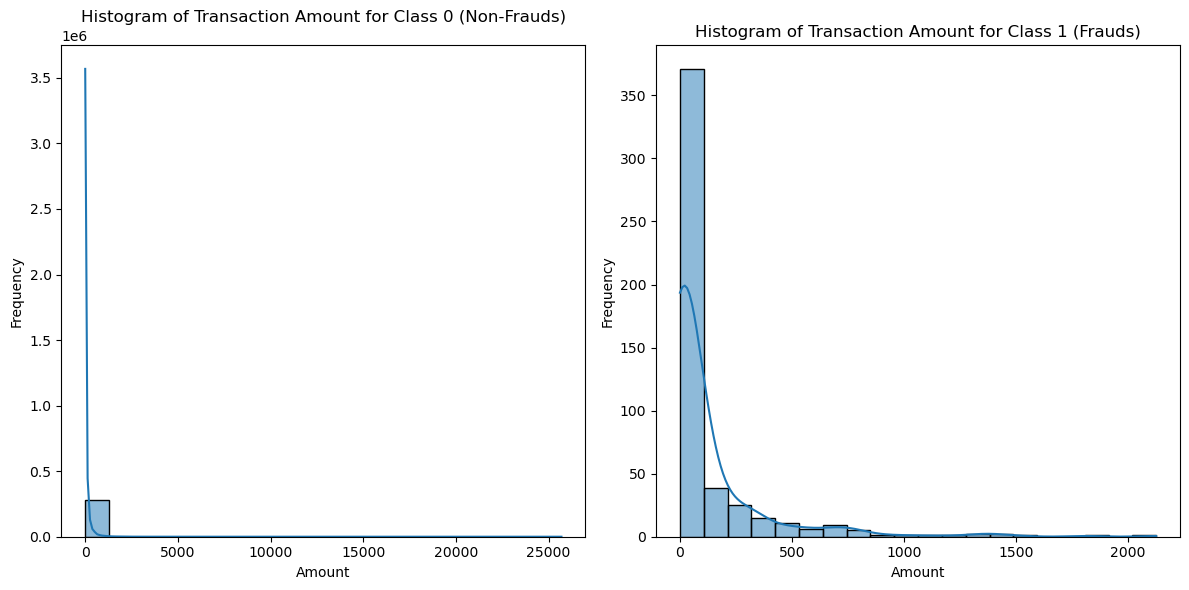

In [10]:
data_class_0 = df[df['Class'] == 0]['Amount']  # Selecting the "Amount" column for Class 0 (non-frauds)
data_class_1 = df[df['Class'] == 1]['Amount']  # Selecting the "Amount" column for Class 1 (frauds)

# Create subplots
plt.figure(figsize=(12, 6))

# Subplot for Class 0
plt.subplot(1, 2, 1)
sns.histplot(data_class_0, bins=20, kde=True)
plt.title("Histogram of Transaction Amount for Class 0 (Non-Frauds)")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# Subplot for Class 1
plt.subplot(1, 2, 2)
sns.histplot(data_class_1, bins=20, kde=True)
plt.title("Histogram of Transaction Amount for Class 1 (Frauds)")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Histo plot for amount 

Text(0, 0.5, 'Frequency')

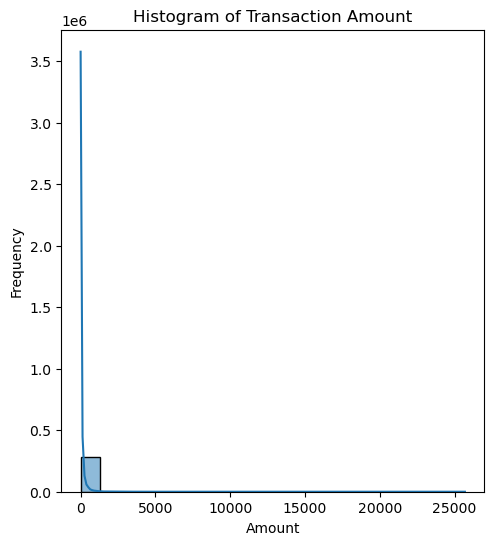

In [11]:
amount = df['Amount'] 


# Create subplots
plt.figure(figsize=(12, 6))

# Subplot for Class 0
plt.subplot(1, 2, 1)
sns.histplot(amount, bins=20, kde=True)
plt.title("Histogram of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")

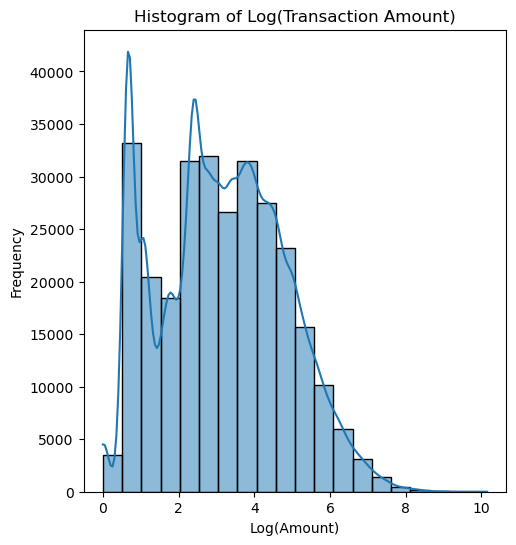

In [14]:
amount = df['Amount']
log_amount = np.log1p(amount)  # Apply log transformation (add 1 to handle zero values)

# Create subplots
plt.figure(figsize=(12, 6))

# Subplot for Class 0
plt.subplot(1, 2, 1)
sns.histplot(log_amount, bins=20, kde=True)
plt.title("Histogram of Log(Transaction Amount)")
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")

plt.show()

### Box plot to find the outliers 

<Axes: >

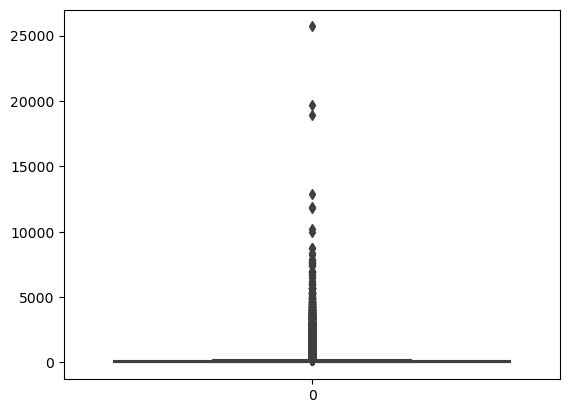

In [12]:
sns.boxplot(amount)

Text(0, 0.5, 'amount')

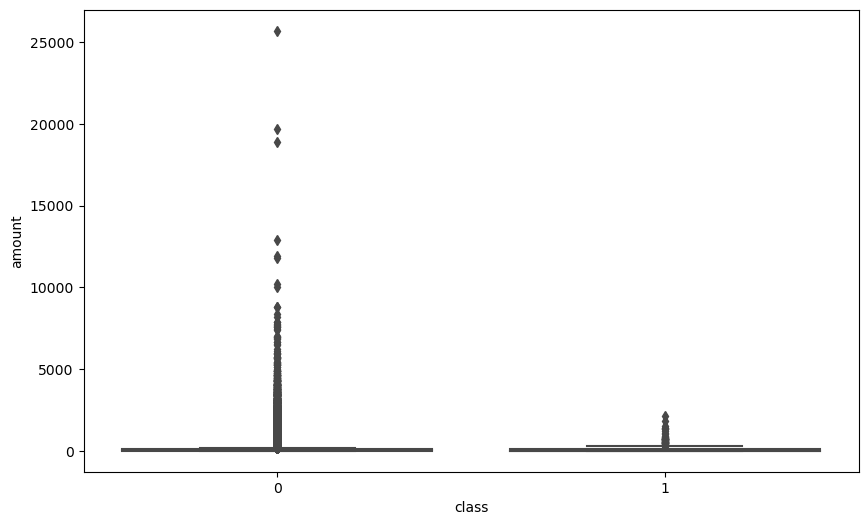

In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Class', y='Amount', palette='Set1')



plt.xlabel('class')
plt.ylabel('amount')

### I feel removing outliers might not help in detetcing fraud because some large amount may be a valid fraud amount so while modeling I am using robost scaler so that will handel outliers

### correlation matrix 

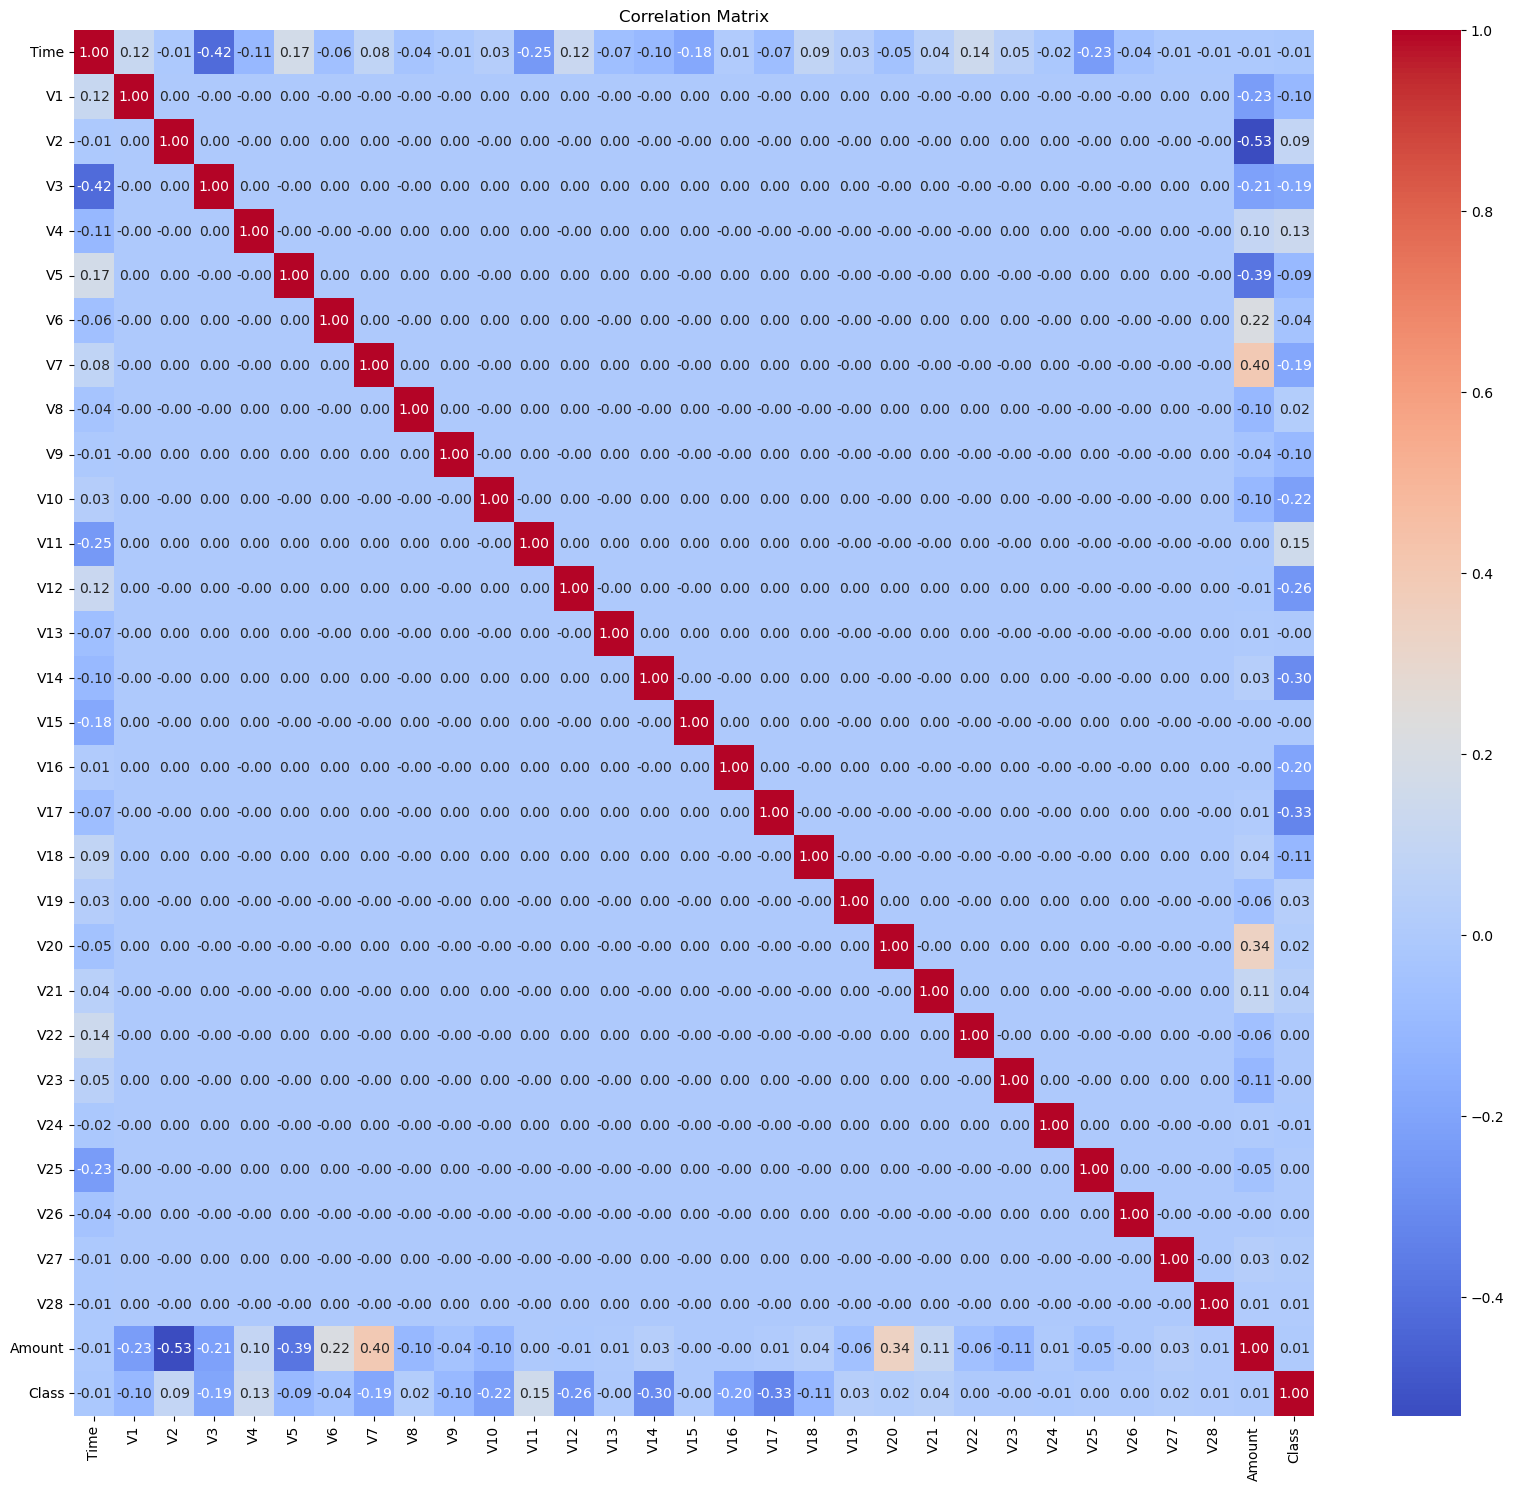

In [14]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### T test for class 0 and 1 with respect to amount

In [15]:
# Extract transaction amounts for fraud and non-fraud cases
fraud_amounts = df[df['Class'] == 1]['Amount']
non_fraud_amounts = df[df['Class'] == 0]['Amount']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(fraud_amounts, non_fraud_amounts, equal_var=False)

# Define the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in transaction amounts.")
    print("p value",p_value)
else:
    print("Fail to reject the null hypothesis. There is no significant difference in transaction amounts.")

Reject the null hypothesis. There is a significant difference in transaction amounts.
p value 0.0035605188517103


### Logeistic Regression 

In [16]:

# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Assuming you have true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)



Accuracy: 0.9991222218320986
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56855     9]
 [   41    57]]


### accuracy wise model is really good 
### Confusion Matrix for detecting non fraud is too good but detecting fraud it is little behind compared to detecting non fraud that good be due to unbalanced data set 

In [17]:
# Input data for prediction
input_data = np.array([
    [406, -2.312226542, 1.951992011, -1.609850733, 3.997905588, -0.522187865, -1.426545319, -2.537387306, 1.391657248, -2.770089277, -2.772272145, 3.202033207, -2.899907388, -0.595221881, -4.289253782, 0.38972412, -1.14074718, -2.830055675, -0.016822468, 0.416955705, 0.126910559, 0.517232371, -0.035049369, -0.465211076, 0.320198199, 0.044519167, 0.177839798, 0.261145003, -0.143275875,7429.15]
])


# Scale the input data using the same StandardScaler used for training
scaler = RobustScaler()
input_data = scaler.fit_transform(input_data)
input_data = scaler.transform(input_data)

# Make a prediction using the logistic regression model
prediction = model.predict(input_data)

# The 'prediction' variable will contain the predicted class (0 or 1)
print("Predicted Class:", prediction)

Predicted Class: [0]


In [ ]:
input_data = np.array([
    [32605, -23.38312854, -18.09880395, -20.19536714, 4.249104237, -42.14789837, 22.52929847, 36.67726795, -4.862799959, 1.645618514, -7.761890376, -0.051013467, -0.023819566, 3.027414326, -0.50498939, 2.032531733, 6.098529451, -0.205513759, -1.03132081, 0.220769294, -13.69458409, -5.893229549, -0.139750972, -6.08617268, 1.924972926, 0.669689054, 0.449781075, 11.13573984, -9.617915452, 7429.15]
])

# Scale the input data using the same StandardScaler used for training
scaler = RobustScaler()
input_data = scaler.fit_transform(input_data)
input_data = scaler.transform(input_data)

# Make a prediction using the logistic regression model
prediction = model.predict(input_data)

# The 'prediction' variable will contain the predicted class (0 or 1)
print("Predicted Class:", prediction)

In [ ]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Assuming you have true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)